## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Load in your data from kaggle.  
By working in a kaggle kernel, you can access the data directly from the competition, as well as make your submission without downloading your output file

In [3]:
'''
train = pd.read_csv('../input/edsa-climate-change-belief-analysis-2021/train.csv')
test = pd.read_csv('../input/edsa-climate-change-belief-analysis-2021/test.csv')
sample = pd.read_csv('../input/edsa-climate-change-belief-analysis-2021/sample_submission.csv')
'''
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./sample_submission.csv')

In [4]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [6]:
sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [7]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='sentiment'>

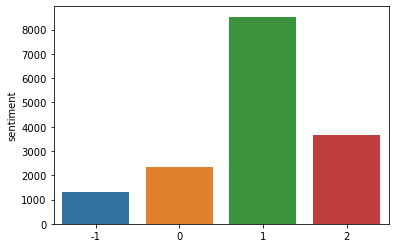

In [8]:
plot =train['sentiment'].value_counts()
sns.barplot(plot.index,plot)

## Splitting out the X variable from the target

In [9]:
y = train['sentiment']
X = train['message']

## Turning text into something your model can read

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

## Splitting the training data into a training and validation set

In [11]:
X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.3,shuffle=True, stratify=y, random_state=11)

## Training the model and evaluating using the validation set 

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_val)

## Checking the performance of our model on the validation set

In [13]:
f1_score(y_val, rfc_pred, average="macro")

0.5540819265753145

## Getting our test set ready 

In [14]:
testx = test['message']
test_vect = vectorizer.transform(testx)

## Making predictions on the test set and adding a sentiment column to our original test df

In [15]:
y_pred = rfc.predict(test_vect)

In [16]:
test['sentiment'] = y_pred

In [17]:
test.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,1
1,Combine this with the polling of staffers re c...,35326,1
2,"The scary, unimpeachable evidence that climate...",224985,1
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,1
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,0


## Creating an output csv for submission

In [18]:
test[['tweetid','sentiment']].to_csv('submission.csv', index=False)